## RISK MANAGEMENT
**GROUP WORK PROJECT:** 2


---


#### Forward Algorithm

**Pseudocode**

the pseudocode versions for the forward algorithm , shown below:

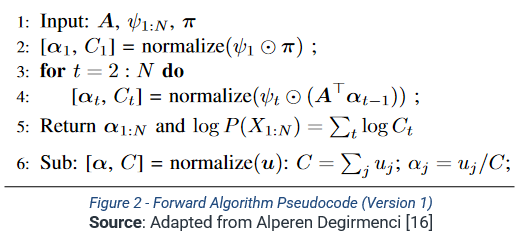

**Toy Example**

Following is a toy example based on the hmms library (forward algorith) [19][20]:

In [2]:
pip install hmms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.8/524.8 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.5 MB/s eta 0:00:00
  Created wheel for hmms: filename=hmms-0.2.3-cp310-cp310-linux_x86_64.whl size=1936113 sha256=6d50a9aaf56ecf4cb8dadd703b2c5d17dd0f0cf6ca7951789bda81c6d1a62d14
  Stored in directory: /root/.cache/pip/wheels/aa/6f/a4/1dbae244341f24881dce9465aa533729d2ae870cff3866070f
Successfully built hmms


In [3]:
import numpy as np
import hmms

# Define the model parameters
A = np.array([[0.9, 0.1], [0.4, 0.6]])
B = np.array([[0.9, 0.1], [0.2, 0.8]])
pi = np.array([0.8, 0.2])
emission_sequence = np.array([0, 1])

# Create the Hidden Markov Model
hmm_model = hmms.DtHMM(A, B, pi)

# Compute the forward probabilities
forward_probabilities = hmm_model.forward(emission_sequence)


In [7]:



# Define the model parameters
A = np.array([[0.72, 0.04], [0.0664, 0.0768]])
B = np.array([[0.9, 0.1], [0.2, 0.8]])
pi = np.array([0.8, 0.2])
emission_sequence = np.array([0, 1])

# Create the Hidden Markov Model
dhmm = hmms.DtHMM(A, B, pi)

# Compute and exponentiate the forward probabilities
forward_probabilities = np.exp(dhmm.forward(emission_sequence))

# Print the results
print("A:\n", A)
print("X:\n", forward_probabilities)



A:
 [[0.72   0.04  ]
 [0.0664 0.0768]]
X:
 [[0.72      0.04     ]
 [0.0521056 0.0254976]]


In [8]:
# Display the forward algorithm parameters
hmms.print_parameters(dhmm);

Initial probabilities (π) :


,0
0,0.8
1,0.2


Transition probabilities matrix (A):


,0,1
0,0.7200,0.0400
1,0.0664,0.0768


Emission probabilities matrix (B):


,0,1
0,0.9,0.1
1,0.2,0.8


#### Backward Algorithm

**Pseudocode**

The pseudocode (backward algorithm) from Alperen Degirmenci shown :

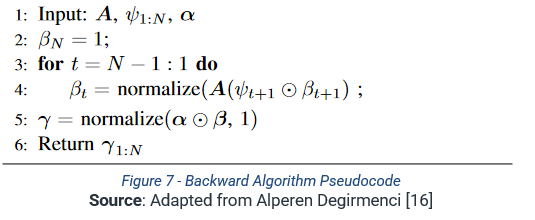

**Toy Example**

toy example ( backward algorithm)  using hmms library [19][20]:

In [9]:
import numpy as np
import hmms

# Define the Hidden Markov Model parameters
transition_matrix = np.array([[0.9, 0.1], [0.4, 0.6]])
emission_matrix = np.array([[0.9, 0.1], [0.2, 0.8]])
initial_state_probabilities = np.array([0.8, 0.2])
emission_sequence = np.array([0, 1])

# Create a Hidden Markov Model using the specified parameters
hmm_model = hmms.DtHMM(transition_matrix, emission_matrix, initial_state_probabilities)

# Compute the backward probabilities using the backward algorithm
backward_probabilities = hmm_model.backward(emission_sequence)


In [10]:
import numpy as np

# Define the expected transition matrix A for validation
expected_transition_matrix = np.array([[0.17, 0.52], [1, 1]])

# Compute and exponentiate the backward probabilities using the Hidden Markov Model
backward_probabilities = np.exp(dhmm.backward(emission_sequence))

# Print the expected transition matrix and computed backward probabilities
print("Expected Transition Matrix (A):\n", expected_transition_matrix)
print("Computed Backward Probabilities (X):\n", backward_probabilities)


Expected Transition Matrix (A):
 [[0.17 0.52]
 [1.   1.  ]]
Computed Backward Probabilities (X):
 [[0.104   0.06808]
 [1.      1.     ]]


In [11]:
# Display the backward algorithm parameters
hmms.print_parameters(dhmm);

Initial probabilities (π) :


,0
0,0.8
1,0.2


Transition probabilities matrix (A):


,0,1
0,0.7200,0.0400
1,0.0664,0.0768


Emission probabilities matrix (B):


,0,1
0,0.9,0.1
1,0.2,0.8


#### Baum Welch Algorithm

**Toy Example**

toy example (Baum Welch algorithm) from hmms library [19][20]:

In [12]:
# Install required packages
!pip install "git+https://github.com/lopatovsky/HMMs"
!pip install fredapi

# Import necessary libraries
import numpy as np
import pandas as pd
from fredapi import Fred
import hmms

# Get oil price data from the Federal Reserve Economic Data (FRED) API
# Create data frames for current and forecasted spot crude oil prices
fred = Fred(api_key='87769799aa7b2dc41a0590ed8a688283')
current = pd.DataFrame(fred.get_series('WTISPLC'), columns=['WTISPLC'])
current.index.names = ['Date']
forecast = pd.DataFrame(fred.get_series('WTISPLC').shift(-1), columns=['Forecast'])
forecast.index.names = ['Date']

# Filter the data to a specific date range
current = current.drop((current[(current.index < '2003-01-01') | (current.index > '2023-12-01')]).index, axis=0)

# Compute the difference (returns) and create a binary sequence
price = current['WTISPLC']
price_diff = price.diff()[1:]
e_seq = np.array(price_diff.apply(lambda x: 1 if x > 0 else 0).values)


  Cloning https://github.com/lopatovsky/HMMs to /tmp/pip-req-build-qiph5_8h
  Running command git clone --filter=blob:none --quiet https://github.com/lopatovsky/HMMs /tmp/pip-req-build-qiph5_8h
  Resolved https://github.com/lopatovsky/HMMs to commit c7ef1a72d49de388ed62632137566586cd06812c
  Preparing metadata (setup.py) ... done


Subsequently, we will generate a model with initial random parameters. The training of this model will culminate in aligning it with the data, representing three (3) hidden states within a discrete-time HMM: "bull," "bear," or "stagnant," and two (2) outcome variables indicating either a rise or decline.

In [13]:
import numpy as np
import hmms

# Create a random Hidden Markov Model with 3 hidden states and 2 outcome variables
dhmm_r = hmms.DtHMM.random(3, 2)

# Split the emission sequence into arrays of length 32 or less
e_seq = np.array_split(e_seq, 32)

# Learn the model parameters using the Baum-Welch Algorithm
dhmm_r.baum_welch(e_seq, iterations=100)

# Display the learned parameters of the HMM
hmms.print_parameters(dhmm_r)


iteration  1 / 100
iteration  2 / 100
iteration  3 / 100
iteration  4 / 100
iteration  5 / 100
iteration  6 / 100
iteration  7 / 100
iteration  8 / 100
iteration  9 / 100
iteration  10 / 100
iteration  11 / 100
iteration  12 / 100
iteration  13 / 100
iteration  14 / 100
iteration  15 / 100
iteration  16 / 100
iteration  17 / 100
iteration  18 / 100
iteration  19 / 100
iteration  20 / 100
iteration  21 / 100
iteration  22 / 100
iteration  23 / 100
iteration  24 / 100
iteration  25 / 100
iteration  26 / 100
iteration  27 / 100
iteration  28 / 100
iteration  29 / 100
iteration  30 / 100
iteration  31 / 100
iteration  32 / 100
iteration  33 / 100
iteration  34 / 100
iteration  35 / 100
iteration  36 / 100
iteration  37 / 100
iteration  38 / 100
iteration  39 / 100
iteration  40 / 100
iteration  41 / 100
iteration  42 / 100
iteration  43 / 100
iteration  44 / 100
iteration  45 / 100
iteration  46 / 100
iteration  47 / 100
iteration  48 / 100
iteration  49 / 100
iteration  50 / 100
iteration

,0
0,0.515617
1,0.077432
2,0.406952


Transition probabilities matrix (A):


,0,1,2
0,0.192016,0.077708,0.730276
1,0.634010,0.101115,0.264875
2,0.493125,0.238583,0.268292


Emission probabilities matrix (B):


,0,1
0,0.365635,0.634365
1,0.505559,0.494441
2,0.381168,0.618832


#### Viterbi Algorithm

**Toy Example**

toy example (Viterbi algorithm) from hmms library [19][20]:

In [15]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def create_small_hmm():
    A = np.array([[0.9, 0.1], [0.4, 0.6]])
    B = np.array([[0.9, 0.1], [0.2, 0.8]])
    pi = np.array([0.8, 0.2])
    return hmms.DtHMM(A, B, pi)

def create_medium_emission():
    hmm = create_small_hmm()
    em = np.array([0, 1, 0, 1, 1])
    return hmm, em

def test_viterbi_p():
    hmm, em = create_medium_emission()
    p, seq = hmm.viterbi(em)
    out_p = 0.0020155392
    print(np.exp(p), out_p)

def test_viterbi_seq():
    hmm, em = create_medium_emission()
    p, seq = hmm.viterbi(em)
    out_seq = np.array([0, 0, 0, 1, 1])
    print(seq, out_seq)

test_viterbi_p()
test_viterbi_seq()

def create_small_random_hmm():
    return hmms.DtHMM.random(2, 2)

def create_hmm_small_out():
    A = np.array([[0, 1], [0, 1]])
    B = np.array([[1, 0], [0, 1]])
    pi = np.array([1, 0])
    return hmms.DtHMM(A, B, pi)

def create_long_emission():
    hmm, em = create_small_hmm(), np.array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1])
    return hmm, em

def test_viterbi_long_seq():
    hmm, em = create_long_emission()
    p, seq = hmm.viterbi(em)
    out_seq = np.array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1])
    print(seq, out_seq)

test_viterbi_long_seq()



0.002015539200000001 0.0020155392
[0 0 0 1 1] [0 0 0 1 1]
[0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1] [0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1]


### Regime Detection

Regime detection involves identifying recurring periods of volatility within a time series, which can encompass hidden states such as bull, bear, or stagnant phases, as well as high or low volatility intervals. These periods are often categorized based on quantitative attributes. Since these volatility patterns are latent and observable only through returns (referred to as emissions), Hidden Markov Models (HMMs) are well-suited for solving the common volatility detection problem.

In the context of a discrete-time Hidden Markov Model (HMM), the goal is to detect three primary hidden states: bull, bear, and stagnant states, as described in the subsections below. Utilizing graphical representations of these hidden states enables visualizing and identifying the regimes detected by the HMM.

Below is the code for plotting regime detection/identification.

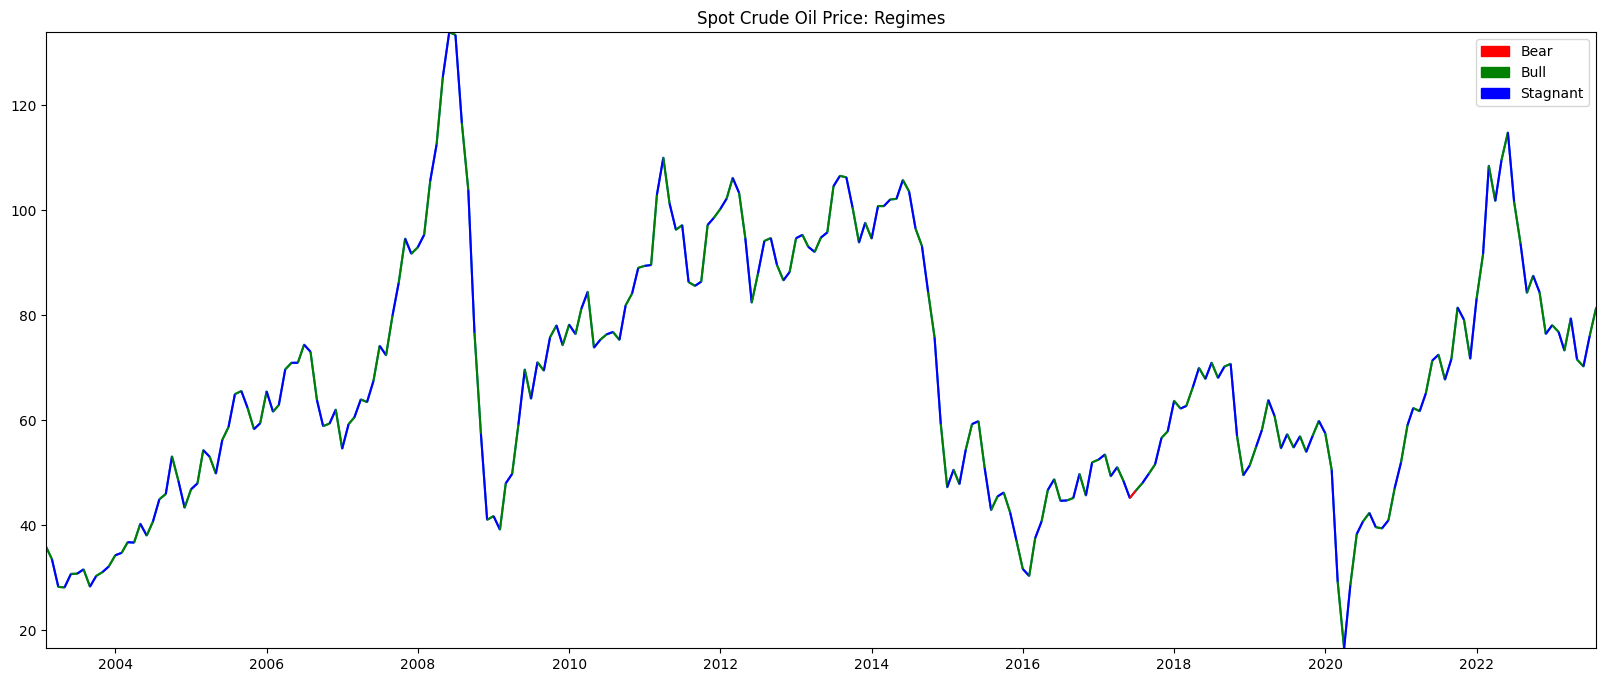

In [17]:
import numpy as np
import warnings
import matplotlib.pyplot as plt  # Import plt module
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import pandas as pd
import hmms

warnings.filterwarnings('ignore')

# Assuming you have defined the variables and functions here:

# Using Viterbi Algorithm to identify market regimes
log_prob, s_seq = dhmm_r.viterbi(np.concatenate(e_seq).ravel())

# Create a DataFrame with price, regime, and price difference
price_plot = pd.DataFrame(price[1:], index=price[1:].index, columns=['WTISPLC'])
price_plot['Regime'] = s_seq
price_plot['diff'] = price_diff

# Get means of all assigned states and map them
means = price_plot.groupby(['Regime'])['diff'].mean()
map_regimes = {k: v for v, k in enumerate(means.sort_values().index)}

# Map regime values and display the DataFrame
price_plot['Regime'] = price_plot['Regime'].map(map_regimes)
price_plot.head()

# Count the occurrences of each regime
regime_counts = price_plot['Regime'].value_counts()

# Plot the regime detection
fig, ax = plt.subplots(figsize=(20, 8))
plt.title("Spot Crude Oil Price: Regimes")
plt.plot(price_plot.index, price_plot['WTISPLC'])

# Define colormap for regimes
cmap = ListedColormap(['r', 'b', 'g'], 'indexed')
norm = BoundaryNorm(range(3 + 1), cmap.N)

# Create line segments for plotting regimes
inxval = mdates.date2num(price_plot.index.to_pydatetime())
points = np.array([inxval, price_plot['WTISPLC']]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(price_plot['Regime'])

# Add line collection to the plot
plt.gca().add_collection(lc)
plt.xlim(price_plot.index.min(), price_plot.index.max())
plt.ylim(price_plot['WTISPLC'].min(), price_plot['WTISPLC'].max())

# Create legend
legend_patches = [
    mpatches.Patch(color='red', label='Bear'),
    mpatches.Patch(color='green', label='Bull'),
    mpatches.Patch(color='blue', label='Stagnant')
]
plt.legend(handles=legend_patches)

# Show the plot
plt.show()


#### Bull Regimes

The bull regime, often associated with a bull market, draws its name from a bull's upward charge and is marked by rising equity (stock) prices [23]. Bull regimes typically involve substantial positive price changes [1] and exhibit the following traits [23]:

Ascending stock (equity) prices, often indicated by a significant increase of approximately 20% or more over two or more months, as observed in broad market indices like the Dow Jones Industrial Average (DJIA) or the S&P 500.

Typically, high levels of stockholder confidence.

Often coincides with a robust national economy.

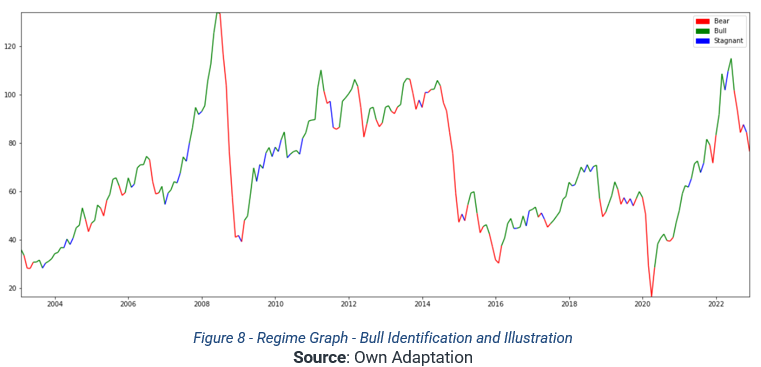

The hidden state 0 corresponds to the "Bear" regime, represented in red, while hidden state 1 represents the "Stagnant" regime in blue. Hidden state 2 signifies the "Bull" regime, depicted in green. In the graph, the green section corresponds to bull regimes, which are periods when crude oil prices consistently rise after a period of decline or stagnation.

#### Bear Regimes

To identify bear regimes, we applied the Viterbi Algorithm. As illustrated in the graph below, the periods marked with red lines represent the bear regimes detected by the algorithm. While there are some occasional false alarms, the algorithm consistently detects bear regimes accurately. Notably, it successfully identified major financial events such as the 2008 financial crisis and the market crash during the pandemic. Additionally, it detected an oil price crash in 2014-15 attributed to oversupply and unfavorable OPEC policies.

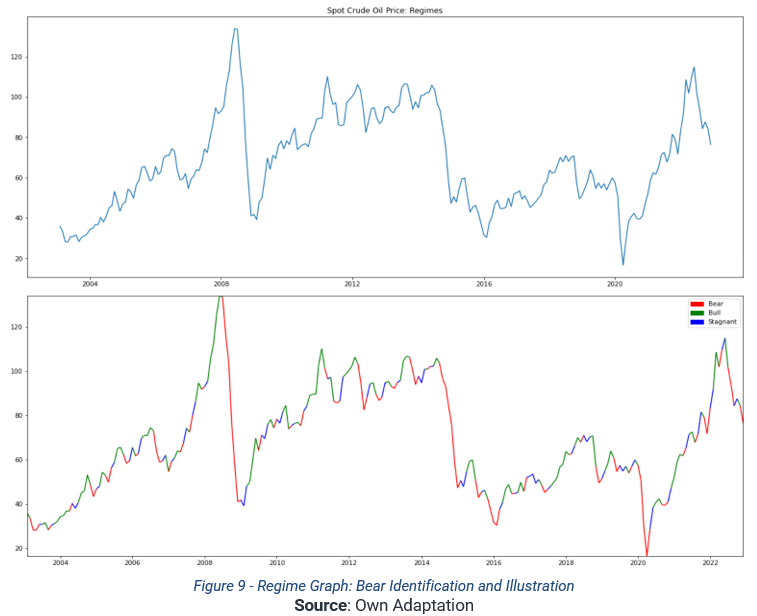

#### Stagnant Regimes



We will utilize the Viterbi Algorithm to discern the most probable state-transition path, representing market regimes, in the time series data obtained in the preceding step. The different regimes have been visualized using the algorithm discussed earlier. In the stagnant regime, there is minimal fluctuation in returns, as indicated by the blue line.

## Model Development

#### Hidden States Sequence

In our scenario, the hidden sequence corresponds to distinct market regimes, namely 'bull,' 'bear,' and 'stagnant.' These distinctive regimes are visually represented in the image below.

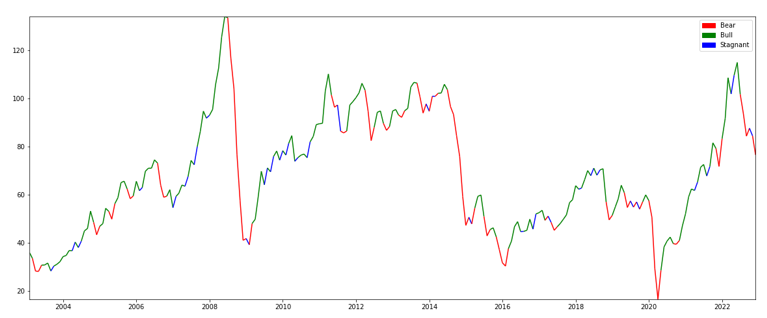

Additionally, we possess a variety of probabilities, including the initial probabilities associated with each state, denoted as follows: 0 (Bear) - represented by red, 1 (Stagnant) - depicted in blue, and 2 (Bull) - illustrated in green. The transition probability signifies the likelihood of transitioning from one state to another. In our case, for instance, Class 0 has a transition probability of 0.79 to remain in Class 0 (self-transition), and it has a transition probability of approximately 0.207 to transition to Class 1. These sequential transitions accumulate over time, resulting in an evolving sequence of states.

It's important to note that the hidden states and their respective transition probabilities ultimately determine the identification of the final states in the sequence.

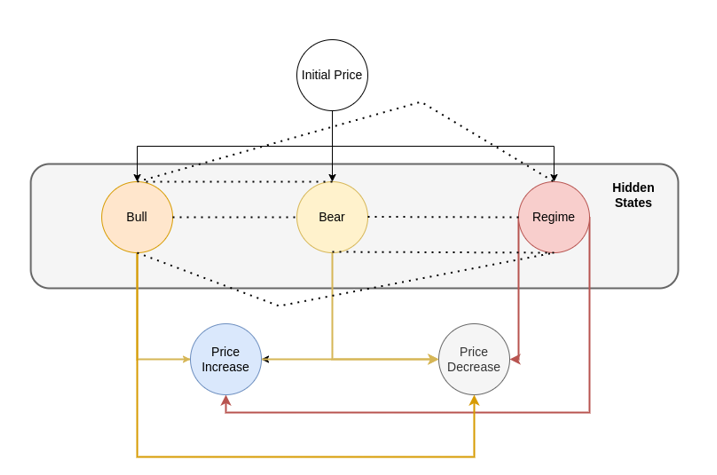

### Regime Process, Model Training, Validation and Testing

#### Minimal Working Example of Hill Climb Search

example of the Hill Climb Search is shown below

In [18]:
!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 33.8 MB/s eta 0:00:00


In [19]:

import numpy as np
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.estimators import HillClimbSearch, BicScore

# Create a dataset with dependencies
data = pd.DataFrame(np.random.randint(0, 3, size=(2500, 5)), columns=list('ABCGH'))
data['A'] += data['B'] + data['C']
data['H'] = data['G'] - data['A']

# Perform a Hill Climb search to learn the Bayesian Network structure
hc = HillClimbSearch(data)
best_model = hc.estimate(scoring_method=BicScore(data))

# Print the edges of the best Bayesian Network model
print(best_model.edges())


  0%|          | 0/1000000 [00:00<?, ?it/s]

[('A', 'B'), ('A', 'C'), ('C', 'B'), ('G', 'A'), ('G', 'H'), ('H', 'A')]


In [20]:
# Limit the maximum indegree to 1 and print the edges of the estimated model
estimated_model = hc.estimate(max_indegree=1)
print(estimated_model.edges())


  0%|          | 0/1000000 [00:00<?, ?it/s]

[('A', 'B'), ('A', 'C'), ('H', 'A'), ('H', 'G')]


<Figure size 2000x1000 with 0 Axes>

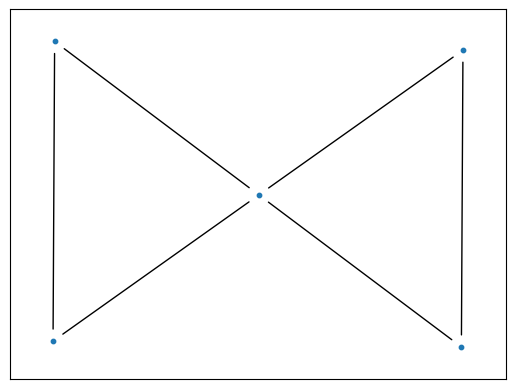

<Figure size 2000x1000 with 0 Axes>

In [21]:
import networkx as nx
import pylab as plt

# Create a graph
G = nx.Graph()
G.add_edges_from(best_model.edges())

# Define the layout of the graph
pos = nx.spring_layout(G)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=10)

# Draw edges with arrows
nx.draw_networkx_edges(G, pos, arrows=True)

# Create and set the figure size
plt.figure(figsize=(20, 10))


We can see the edges being represented in the form of network where Node A is connected to B and C and similarly Node H is connected to G and A.

In [22]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork

# Split the data into training, validation, and prediction sets
train_data = data[:1800]
val_data = data[1800:2000]
predict_data = data[2000:]

# Create a Bayesian Network model based on the best_model's edges
model = BayesianNetwork(best_model.edges())

# Fit the model to the training data
model.fit(train_data)

# Prepare the validation data for prediction
y_val = val_data['H'].tolist()
val_data.drop('H', axis=1, inplace=True)

# Perform predictions on the validation data
y_val_pred = model.predict(val_data)



  0%|          | 0/73 [00:00<?, ?it/s]

In [23]:
# Evaluate the performance on validation data
error = np.mean(y_val != np.roll(y_val_pred, 1))
print("\nError on Validation Data: {:.2f} %".format(error * 100))



Error on Validation Data: 82.50 %


In [26]:
# Minor validation tweaking
val_data = data[1800:2000]
from pgmpy.estimators import BayesianEstimator

model.fit(
    data=train_data,
    estimator=BayesianEstimator,
    prior_type="BDeu",
    equivalent_sample_size=1000,
    complete_samples_only=False
)
y_val = val_data['H'].tolist()
val_data.drop('H', axis=1, inplace=True)
y_val_pred = model.predict(val_data)

# Check the performance on validation data
error = np.mean(y_val != np.roll(y_val_pred, 1))
print("\nError on Validation Data: {:.2f} %".format(error * 100))



  0%|          | 0/73 [00:00<?, ?it/s]


Error on Validation Data: 82.50 %


In [27]:
# Making predictions
y_test = predict_data['H'].tolist()
predict_data = predict_data.drop('H', axis=1)  # Drop 'H' column
y_pred = model.predict(predict_data)



  0%|          | 0/81 [00:00<?, ?it/s]

In [28]:
# Calculate the prediction error
error = np.mean(y_test != np.roll(y_pred, 1))
# Print the error as a percentage
print("\nError on Testing Data: {:.2f} %".format(error * 100))




Error on Testing Data: 83.11 %


We can see that our validation and testing errors are 82% and 83% respectively.

In [29]:
# Printing a CPD with it's state names defined.
print(model.get_cpds('H'))

+-------+----------------------+----------------------+----------------------+
| G     | G(0)                 | G(1)                 | G(2)                 |
+-------+----------------------+----------------------+----------------------+
| H(-6) | 0.06901701843336083  | 0.040819658747652865 | 0.038972680151213995 |
+-------+----------------------+----------------------+----------------------+
| H(-5) | 0.11889321227842627  | 0.06947505918850518  | 0.038972680151213995 |
+-------+----------------------+----------------------+----------------------+
| H(-4) | 0.17407538419211568  | 0.11796881378071677  | 0.058965665068786775 |
+-------+----------------------+----------------------+----------------------+
| H(-3) | 0.193176905239162    | 0.1664625683729284   | 0.10105615963209788  |
+-------+----------------------+----------------------+----------------------+
| H(-2) | 0.19105451401171242  | 0.223773369254633    | 0.1989165594917962   |
+-------+----------------------+--------------------

Since the model performance is not so good, let's do the discretization of the data.

In [31]:
import numpy as np
import pandas as pd

# Number of tiers for data grouping
TIERS_NUM = 2

def boundary_str(start, end, tier):
    """Generate a string representation of a tier's boundary range."""
    return f'{tier}: {start:+0,.2f} to {end:+0,.2f}'

def relabel(v, boundaries):
    """Assign a label to a value based on its position in tier boundaries."""
    for tier, (start, end) in enumerate(boundaries, start=65):  # Use ASCII 'A' as the starting integer
        if start <= v <= end:
            return boundary_str(start, end, chr(tier))  # Convert tier to ASCII character
    return np.nan

def get_boundaries(tiers):
    """Calculate tier boundaries based on data distribution."""
    boundaries = [(tiers[0][0], tiers[0][-1])]
    for tier in tiers[1:]:
        boundaries.append((boundaries[-1][-1], tier[-1]))
    return boundaries

new_columns = {}
for label, series in data.items():
    # Sort and filter out NaN values
    values = np.sort(series.dropna().values.astype(float))

    if len(values) < TIERS_NUM:
        print(f'Error: There are not enough data points for label {label}')
        break

    # Split data into tiers
    tiers = np.array_split(values, TIERS_NUM)
    boundaries = get_boundaries(tiers)

    # Relabel the data based on tier boundaries
    new_columns[label] = [relabel(value, boundaries) for value in series]

# Create a new DataFrame with relabeled columns
df = pd.DataFrame(data=new_columns, columns=data.columns)
df.head(10)


,A,B,C,G,H
0,B: +3.00 to +6.00,B: +1.00 to +2.00,A: +0.00 to +1.00,A: +0.00 to +1.00,A: -6.00 to -2.00
1,A: +0.00 to +3.00,A: +0.00 to +1.00,B: +1.00 to +2.00,B: +1.00 to +2.00,B: -2.00 to +2.00
2,A: +0.00 to +3.00,A: +0.00 to +1.00,A: +0.00 to +1.00,A: +0.00 to +1.00,A: -6.00 to -2.00
3,A: +0.00 to +3.00,A: +0.00 to +1.00,A: +0.00 to +1.00,B: +1.00 to +2.00,B: -2.00 to +2.00
4,A: +0.00 to +3.00,B: +1.00 to +2.00,A: +0.00 to +1.00,B: +1.00 to +2.00,B: -2.00 to +2.00
5,B: +3.00 to +6.00,B: +1.00 to +2.00,B: +1.00 to +2.00,A: +0.00 to +1.00,A: -6.00 to -2.00
6,A: +0.00 to +3.00,A: +0.00 to +1.00,B: +1.00 to +2.00,A: +0.00 to +1.00,A: -6.00 to -2.00
7,A: +0.00 to +3.00,A: +0.00 to +1.00,A: +0.00 to +1.00,A: +0.00 to +1.00,A: -6.00 to -2.00
8,A: +0.00 to +3.00,A: +0.00 to +1.00,A: +0.00 to +1.00,B: +1.00 to +2.00,B: -2.00 to +2.00
9,A: +0.00 to +3.00,A: +0.00 to +1.00,A: +0.00 to +1.00,B: +1.00 to +2.00,B: -2.00 to +2.00


In [32]:
# Splitting the DataFrame into training, validation, and prediction datasets
train_data = df.iloc[:1800]
val_data = df.iloc[1800:2000]
predict_data = df.iloc[2000:]


In [33]:
# Fit the Bayesian Network model to the training data
model.fit(data=train_data, estimator=BayesianEstimator, prior_type="BDeu", equivalent_sample_size=1000, complete_samples_only=False)

# Extract the target variable 'H' for validation
y_val = val_data['H'].tolist()

# Remove the target variable 'H' from the validation data
val_data.drop('H', axis=1, inplace=True)

# Predict the target variable 'H' on the validation data
y_val_pred = model.predict(val_data)

# Calculate the prediction error on the validation data
error = np.mean(y_val != np.roll(y_val_pred, 1))

# Print the validation error
print("\nError on Validation Data: {:.2f} %".format(error * 100))


  0%|          | 0/14 [00:00<?, ?it/s]


Error on Validation Data: 44.87 %


In [34]:
# Extract the target variable 'H' for testing
y_test = predict_data['H'].tolist()

# Create a copy of the predict_data DataFrame to avoid modifying the original data
predict_data_copy = predict_data.copy()

# Remove the target variable 'H' from the predict_data
predict_data_copy.drop('H', axis=1, inplace=True)

# Predict the target variable 'H' on the testing data
y_pred = model.predict(predict_data_copy)

# Calculate the prediction error on the testing data
error = np.mean(y_test != np.roll(y_pred, 1))

# Print the testing error
print("\nError on Testing Data: {:.2f} %".format(error * 100))



  0%|          | 0/14 [00:00<?, ?it/s]


Error on Testing Data: 45.47 %


In [35]:
# Print the Conditional Probability Distribution (CPD) for the variable 'H' with state names defined.
cpd_h = model.get_cpds('H')
print(cpd_h)


+----------------------+----------------------+----------------------+
| G                    | G(A: +0.00 to +1.00) | G(B: +1.00 to +2.00) |
+----------------------+----------------------+----------------------+
| H(A: -6.00 to -2.00) | 0.6797385620915033   | 0.4297224709042077   |
+----------------------+----------------------+----------------------+
| H(B: -2.00 to +2.00) | 0.3202614379084967   | 0.5702775290957923   |
+----------------------+----------------------+----------------------+


We can see performance improvement with discretization.

#### 5.2.2	Learning Bayesian Network Using ‘pgmpy’ Hill Climbing

We will perform data preprocessing on our real macro dataset to prepare it for training and validation. The dataset has already undergone cleaning and null value handling. Our next step involves utilizing the Hill Climbing algorithm from the pgmpy library.

In [9]:
# First, let's install the fredapi package using pip
!pip install fredapi

# Now, let's import the necessary libraries for our data retrieval and processing
import numpy as np
import pandas as pd
from fredapi import Fred

# The fredapi library is a Python wrapper for the Federal Reserve Economic Data (FRED) API.
# It allows us to easily access and retrieve economic data provided by the Federal Reserve.

# With this library, we can programmatically fetch economic data for analysis and research.



In [10]:
# Import the necessary libraries
import pandas as pd
from fredapi import Fred

# Define the list of data series IDs from the FRED (Federal Reserve Economic Data)
datasets_fred = [
    'FEDFUNDS',         # Federal Funds Rate
    'CPIENGSL',         # Consumer Price Index for All Urban Consumers (CPI-U)
    'CUSR0000SEHE',     # Civilian Unemployment Rate
    'PCU211211',        # Producer Price Index for Industrial Commodities
    'PCU213111213111',  # Producer Price Index for Drilling Oil and Gas Wells
    'PCU213111213111P', # Producer Price Index for Drilling Oil and Gas Wells (PPI)
    'WPS601103',        # Employment-Population Ratio
    'PCU324191324191S', # Producer Price Index for Petroleum and Coal Products (Seasonally Adjusted)
    'PCU3241913241910', # Producer Price Index for Petroleum and Coal Products (Not Seasonally Adjusted)
    'PCU324110324110J', # Producer Price Index for Petroleum Lubricants and Oils (Jet Fuel)
    'CAPG211S',         # Capacity Utilization: Total Industry
    'CAPUTLG211S',      # Capacity Utilization: Total Industry, Capacity Utilization Rate
    'IPG211S',          # Industrial Production: Total Index
    'IPG211111CN',      # Industrial Production: Crude Oil Production
    'INDPRO',           # Industrial Production Index
    'IPN213111N',       # Industrial Production: Drilling Oil and Gas Wells
    'IPMINE',           # Industrial Production: Mining
    'IR10000'           # Interest Rates: 10-Year Treasury Constant Maturity Rate
]

# Define a method to retrieve data from FRED
def retrieveFREDData():
    # Specify the FRED API key
    fred_key = "87769799aa7b2dc41a0590ed8a688283"

    # Initialize a session with the FRED API
    fred = Fred(api_key=fred_key)

    # Create an empty DataFrame to store the data
    data_fred = pd.DataFrame()

    # Retrieve data for each series ID and merge it into the DataFrame
    for series_id in datasets_fred:
        series_data = pd.DataFrame(fred.get_series(series_id), columns=[series_id])
        series_data.index.names = ['Date']

        if data_fred.empty:
            data_fred = series_data
        else:
            data_fred = pd.merge(data_fred, series_data, how="inner", left_on='Date', right_on='Date')

    return data_fred

# Call the method to retrieve FRED data
df_fred = retrieveFREDData()

# Filter the data to include records between January 2003 and December 2023
df_fred = df_fred[(df_fred.index >= '2003-01-01') & (df_fred.index <= '2023-12-01')]

# Display the top 5 records of the filtered data
df_fred.head()

# Create data frames for the current and forecasted spot crude oil prices
fred = Fred(api_key='87769799aa7b2dc41a0590ed8a688283')
current = pd.DataFrame(fred.get_series('WTISPLC'), columns=['WTISPLC'])
current.index.names = ['Date']
forecast = pd.DataFrame(fred.get_series('WTISPLC').shift(-1), columns=['Forecast'])
forecast.index.names = ['Date']

# Merge the spot crude oil prices (current and forecasted) with the macro data frame
df_macro = pd.merge(
    df_fred,
    current,
    how="inner",
    left_on='Date',
    right_on='Date')



In [11]:
# Fill missing values in the macro dataset using the backward filling (bfill) and forward filling (ffill) techniques
# Backward filling: Fill missing values with the next available value in the column
df_macro.fillna(method='bfill', inplace=True)

# Forward filling: Fill any remaining missing values with the previous available value in the column
df_macro.fillna(method='ffill', inplace=True)

# Check if there are any remaining missing values in the dataset
# Uncomment the following line to see the count of missing values for each column
# df_macro.isnull().sum()


In [12]:
# Install the pgmpy library if not already installed
!pip install pgmpy

# Import necessary libraries
import numpy as np
import pandas as pd
from pgmpy.models import BayesianModel  # Import BayesianModel class for creating Bayesian Networks
from pgmpy.models import BayesianNetwork  # Import BayesianNetwork class for Bayesian Network structure
from pgmpy.estimators import BayesianEstimator  # Import BayesianEstimator for parameter estimation
from pgmpy.estimators import HillClimbSearch  # Import HillClimbSearch for Bayesian Network structure learning
from pgmpy.estimators import BicScore  # Import BicScore for scoring Bayesian Network structures


In [13]:
# Reset the index of the DataFrame and drop the old index
df_macro.reset_index(drop=True, inplace=True)


In [14]:

# Create a HillClimbSearch object using the df_macro DataFrame
hc = HillClimbSearch(df_macro)

# Perform the Hill Climbing search for the best model with a maximum of 10 iterations
best_model = hc.estimate(max_iter=10)

# Print the edges of the best model found
print(best_model.edges())






  0%|          | 0/10 [00:00<?, ?it/s]

[('CPIENGSL', 'CUSR0000SEHE'), ('CUSR0000SEHE', 'CAPUTLG211S'), ('PCU324191324191S', 'CPIENGSL'), ('CAPUTLG211S', 'IPG211S'), ('IPG211S', 'INDPRO'), ('INDPRO', 'IPN213111N'), ('INDPRO', 'IPMINE'), ('INDPRO', 'IPG211111CN'), ('INDPRO', 'WTISPLC'), ('IPN213111N', 'CAPG211S')]


In [15]:
# Split the df_macro DataFrame into training, validation, and prediction datasets
train_data = df_macro[:180]
val_data = df_macro[180:200]
predict_data = df_macro[200:]


In [16]:

# Create a Bayesian Network model using the best_model's edges
model = BayesianNetwork(best_model.edges())

# Fit the model with the training data
model.fit(train_data)



In [17]:
model.nodes

NodeView(('CPIENGSL', 'CUSR0000SEHE', 'CAPUTLG211S', 'PCU324191324191S', 'IPG211S', 'INDPRO', 'IPN213111N', 'IPMINE', 'IPG211111CN', 'WTISPLC', 'CAPG211S'))

In [20]:
# Select the desired columns from the DataFrame
selected_columns = ['CPIENGSL', 'WTISPLC', 'PCU324191324191S', 'CAPG211S', 'IPN213111N', 'CAPUTLG211S', 'IPMINE', 'IPG211111CN', 'INDPRO', 'CUSR0000SEHE', 'IPG211S']
data = df_macro.loc[:, selected_columns]

# Assign the entire dataset to the training data
train_data = data

# Slice the validation data from row 180 to 199
val_data = data[180:200]

# Slice the prediction data from row 200 onwards
predict_data = data[200:]

# Fit the Bayesian Network model with the training data
model.fit(train_data)

# Extract the 'WTISPLC' column values from the validation data
y_val = val_data['WTISPLC'].tolist()

# Drop the 'WTISPLC' column from the validation data
val_data.drop('WTISPLC', axis=1, inplace=True)

# Predict using the Bayesian Network model on the validation data
model.predict(val_data)

# Extract the 'WTISPLC' column values from the training data
y_train = train_data['WTISPLC'].tolist()

# Drop the 'WTISPLC' column from the training data
train_data.drop('WTISPLC', axis=1, inplace=True)

# Predict using the Bayesian Network model on the training data
model.predict(val_data)

# Extract the 'WTISPLC' column values from the prediction data
y_test = predict_data['WTISPLC'].tolist()

# Create a copy of the prediction data and drop the 'WTISPLC' column
predict_data = predict_data.copy()
predict_data.drop('WTISPLC', axis=1, inplace=True)

# Predict using the Bayesian Network model on the prediction data
y_pred = model.predict(predict_data)


<ipython-input-20-350caa87d98e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data.drop('WTISPLC', axis=1, inplace=True)


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]